# Loading and visualizing data from a NetCDF file 

In this notebook, we will use [Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html#opening-netcdf-data) to open up the NetCDF file

Start by import the necessary packages. 

- [cartopy](https://scitools.org.uk/cartopy/docs/latest/): for maps
- [cmocean](https://matplotlib.org/cmocean/): pretty(!) colormaps for common variables in oceanography
- [numpy](https://numpy.org/doc/): n-dimensional arrays in python
- [pandas](https://pandas.pydata.org/docs/): data frames in python. We will be using the `datetime` functionality (specifically [`to_timedelta`](https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html)). 
- [xarray](https://docs.xarray.dev/): for loading and managing multi-dimensional data

In [1]:
import cartopy.crs as ccrs
import cmocean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

## Example 1: NASA-Aqua Modis Chlorophyll data

Define the path to the data. Note that I downloaded the data and put it in a `./data/` directory

In [2]:
filepath = "./data/AQUA_MODIS.20020801_20210831.L3m.MC.CHL.chlor_a.4km.nc"

We will use Xarray to load the dataset into an object called `ds_chlor`. Note that Xarray has a nice way to display what is in the NetCDF file

In [3]:
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20020801_20210831.L3m.MC.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        19999675
    data_minimum:                     0.0031615312
    data_maximum:                     85.70982

Now that we have the object created, we can access individual fields.

In [4]:
chlor = ds.chlor_a

In [5]:
chlor

<xarray.DataArray 'chlor_a' (lat: 4320, lon: 8640)>
[37324800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

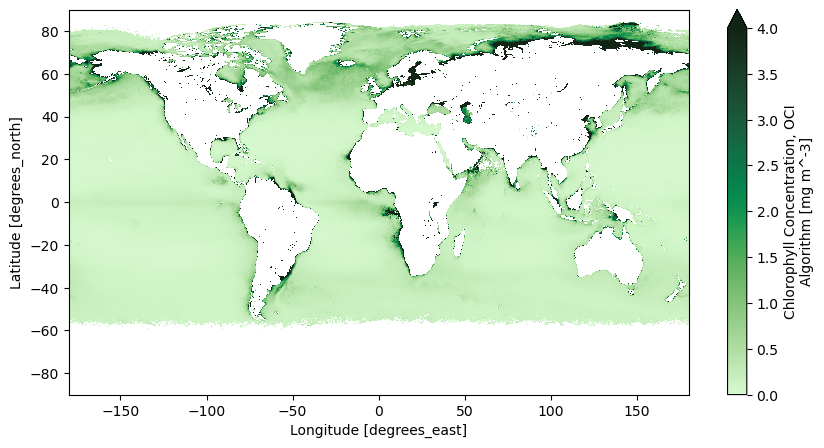

In [6]:
chlor.plot(size=5, aspect=2, vmin=0, vmax=4, cmap=cmocean.cm.algae)

Lets focus on South America

In [7]:
lat_range = np.r_[-70, 20]
lon_range = np.r_[-100, -20]

lat_inds = (
    (chlor.lat >= lat_range.min()) & 
    (chlor.lat <= lat_range.max())
)
lon_inds = (
    (chlor.lon >= lon_range.min()) & 
    (chlor.lon <= lon_range.max())
)
chlor_focus = chlor[lat_inds, lon_inds]

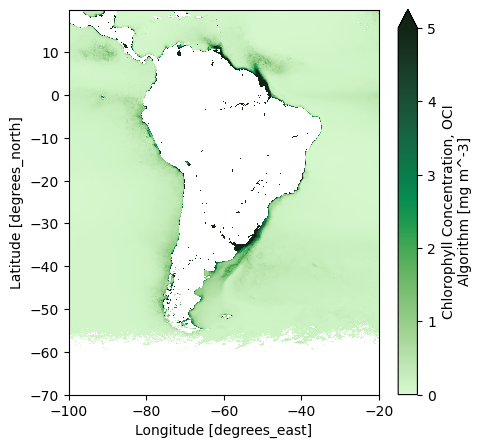

In [8]:
chlor_focus.plot(
    size=5, aspect=1, vmin=0, vmax=5, cmap=cmocean.cm.algae,
)

Say we want to project this onto the globe... We will use cartopy for this

In [9]:
chlor.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [10]:
lat_range = np.r_[-90, 90]
lon_range = np.r_[-180, 0] 

lat_inds = (
    (chlor.lat >= lat_range.min()) & 
    (chlor.lat <= lat_range.max())
)
lon_inds = (
    (chlor.lon >= lon_range.min()) & 
    (chlor.lon <= lon_range.max())
)
chlor_west_coast = chlor[lat_inds, lon_inds]

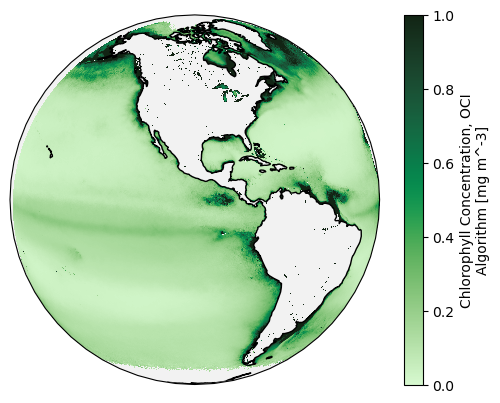

In [11]:
p = chlor_west_coast.plot(
    subplot_kws=dict(
        projection=ccrs.Orthographic(-100, 10), facecolor=0.95*np.r_[1, 1, 1],
    ),
    transform=ccrs.PlateCarree()
)
p.set_clim(np.r_[0, 1])
p.set_cmap(cmocean.cm.algae)

p.axes.set_global()
p.axes.coastlines()

## Example 2: BGCArgo data from near Station P

In [12]:
filepath = "./data/BioArgo_5905988_Sprof.nc"
dsargo = xr.load_dataset(filepath)
dsargo

<xarray.Dataset>
Dimensions:                          (N_PROF: 195, N_PARAM: 9, N_CALIB: 1,
                                      N_LEVELS: 407)
Dimensions without coordinates: N_PROF, N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/93)
    DATA_TYPE                        object b'Argo synthetic profile          '
    FORMAT_VERSION                   object b'1.0 '
    HANDBOOK_VERSION                 object b'1.2 '
    REFERENCE_DATE_TIME              object b'19500101000000'
    DATE_CREATION                    object b'20220902071317'
    DATE_UPDATE                      object b'20220902071317'
    ...                               ...
    NITRATE                          (N_PROF, N_LEVELS) float32 nan nan ... nan
    NITRATE_QC                       (N_PROF, N_LEVELS) object nan nan ... nan
    NITRATE_dPRES                    (N_PROF, N_LEVELS) float32 nan nan ... nan
    NITRATE_ADJUSTED                 (N_PROF, N_LEVELS) float32 nan nan ... nan
    NITRATE_ADJUSTED_QC              (N_PROF, N_LEVELS) object nan nan ... nan
    NITRATE_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 nan nan ... nan
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2022-09-02T07:13:17Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.14 (version 09.06.2022 for ARGO_simplified_profile)

In [13]:
dsargo.JULD

<xarray.DataArray 'JULD' (N_PROF: 195)>
array(['2018-08-16T23:45:28.002532864', '2018-08-18T05:42:53.000597248',
       '2018-08-19T17:34:52.001873152', '2018-08-20T05:53:42.000613120',
       '2018-08-20T16:34:18.001765888', '2018-08-22T15:43:46.001671936',
       '2018-08-23T04:34:39.000478464', '2018-08-23T16:38:21.001771776',
       '2018-08-24T16:52:09.001792000', '2018-08-26T17:05:00.001831168',
       '2018-08-27T05:48:29.000605952', '2018-08-27T17:48:35.001893632',
       '2018-08-29T16:48:42.001786112', '2018-08-30T04:38:18.000484096',
       '2018-08-30T16:37:36.001770240', '2018-09-02T16:59:55.001802240',
       '2018-09-03T05:26:50.000573952', '2018-09-03T17:27:08.001863168',
       '2018-09-05T17:08:25.001835520', '2018-09-06T05:20:43.000565504',
       '2018-09-06T17:16:12.001847040', '2018-09-09T17:00:49.001823744',
       '2018-09-10T05:30:34.000579840', '2018-09-10T17:30:28.001867520',
       '2018-09-12T16:52:45.001792000', '2018-09-13T05:17:03.000561152',
       '2018-09-13T17:31:15.001869056', '2018-09-16T17:00:45.001823744',
       '2018-09-17T05:21:36.000566784', '2018-09-17T17:28:59.001864448',
       '2018-09-19T17:01:20.001825280', '2018-09-20T05:31:32.000581376',
       '2018-09-20T17:25:39.001860352', '2018-09-23T16:58:11.001800960',
       '2018-09-24T05:29:46.000578560', '2018-09-24T17:30:37.001867264',
       '2018-09-26T16:49:20.001787648', '2018-10-06T17:08:37.001835264',
       '2018-10-16T17:53:43.001900800', '2018-10-26T18:57:07.002013952',
...
       '2021-08-14T22:02:34.002363136', '2021-08-25T02:26:26.000252160',
       '2021-09-04T06:46:54.000710656', '2021-09-14T11:06:05.001188864',
       '2021-09-24T15:26:37.001646848', '2021-10-04T19:40:18.002096384',
       '2021-10-14T23:54:53.002545920', '2021-10-25T03:58:43.000406016',
       '2021-11-04T14:53:36.001579008', '2021-11-14T15:02:03.001612288',
       '2021-11-24T16:11:57.001732352', '2021-12-04T17:11:27.001839872',
       '2021-12-14T17:28:46.001864704', '2021-12-24T18:21:46.001961728',
       '2022-01-03T19:55:06.002118656', '2022-01-13T20:21:38.002176256',
       '2022-01-23T20:54:11.002224384', '2022-02-02T21:19:06.002280704',
       '2022-02-12T22:08:18.002371840', '2022-02-22T22:47:25.002428416',
       '2022-03-04T23:50:26.002540032', '2022-03-15T00:18:12.000026112',
       '2022-03-25T02:06:10.000223232', '2022-04-04T02:57:20.000297472',
       '2022-04-14T04:38:11.000484352', '2022-04-24T05:48:03.000606208',
       '2022-05-04T06:46:11.000710656', '2022-05-14T07:16:31.000774400',
       '2022-05-24T07:57:48.000833792', '2022-06-03T08:28:31.000899072',
       '2022-06-13T08:55:38.000938240', '2022-06-23T09:40:54.001023744',
       '2022-07-03T10:12:57.001090048', '2022-07-13T11:04:10.001185792',
       '2022-07-23T12:07:46.001297664', '2022-08-02T12:32:51.001334016',
       '2022-08-12T13:46:35.001461504', '2022-08-22T14:31:19.001547008',
       '2022-09-01T15:10:15.001623808'], dtype='datetime64[ns]')
Dimensions without coordinates: N_PROF
Attributes:
    long_name:      Julian day (UTC) of the station relative to REFERENCE_DAT...
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    axis:           T
    resolution:     1.1574074051168282e-05

In [14]:
dsargo = dsargo.assign_coords({"time": dsargo.JULD})
dsargo

<xarray.Dataset>
Dimensions:                          (N_PROF: 195, N_PARAM: 9, N_CALIB: 1,
                                      N_LEVELS: 407)
Coordinates:
    time                             (N_PROF) datetime64[ns] 2018-08-16T23:45...
Dimensions without coordinates: N_PROF, N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/93)
    DATA_TYPE                        object b'Argo synthetic profile          '
    FORMAT_VERSION                   object b'1.0 '
    HANDBOOK_VERSION                 object b'1.2 '
    REFERENCE_DATE_TIME              object b'19500101000000'
    DATE_CREATION                    object b'20220902071317'
    DATE_UPDATE                      object b'20220902071317'
    ...                               ...
    NITRATE                          (N_PROF, N_LEVELS) float32 nan nan ... nan
    NITRATE_QC                       (N_PROF, N_LEVELS) object nan nan ... nan
    NITRATE_dPRES                    (N_PROF, N_LEVELS) float32 nan nan ... nan
    NITRATE_ADJUSTED                 (N_PROF, N_LEVELS) float32 nan nan ... nan
    NITRATE_ADJUSTED_QC              (N_PROF, N_LEVELS) object nan nan ... nan
    NITRATE_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 nan nan ... nan
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2022-09-02T07:13:17Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.14 (version 09.06.2022 for ARGO_simplified_profile)

In [15]:
pres = dsargo.PRES_ADJUSTED
doxy = dsargo.DOXY_ADJUSTED
temp = dsargo.TEMP_ADJUSTED
chla = dsargo.CHLA

In [16]:
pres.shape, doxy.shape, temp.shape, chla.shape

((195, 407), (195, 407), (195, 407), (195, 407))

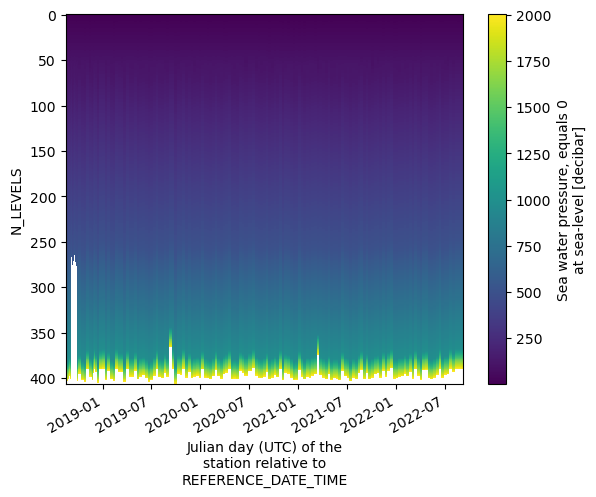

In [17]:
fig, ax = plt.subplots(1, 1)
pres.plot(x="time", ax=ax)
ax.invert_yaxis()

## Example 3: Glider Data

In [18]:
filepath_data = "./data/glider_dfo-k999-20220803.nc"
filepath_grid = "./data/glider_dfo-k999-20220803_grid.nc"

dsglider = xr.load_dataset(filepath_data)
dsglider

<xarray.Dataset>
Dimensions:                (time: 13045)
Coordinates:
  * time                   (time) datetime64[ns] 2022-08-03T15:06:47 ... 2022...
    latitude               (time) float64 48.98 48.98 48.98 ... 48.68 48.68
    longitude              (time) float64 -126.1 -126.1 -126.1 ... -127.0 -127.0
    depth                  (time) float64 nan nan nan nan ... 16.92 nan nan
Data variables: (12/19)
    heading                (time) float64 nan nan nan nan ... 1.792 1.81 nan nan
    pitch                  (time) float64 nan nan nan nan ... 0.486 nan nan
    roll                   (time) float64 nan nan nan ... -0.06646 -0.07379 nan
    waypoint_latitude      (time) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    waypoint_longitude     (time) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    conductivity           (time) float64 nan -0.0001 nan ... 3.656 3.861 nan
    ...                     ...
    salinity               (time) float64 nan nan nan 31.0 ... 32.08 31.87 nan
    potential_density      (time) float64 nan nan nan nan ... 1.024e+03 nan nan
    density                (time) float64 nan nan nan ... 1.024e+03 nan
    potential_temperature  (time) float64 nan nan nan 11.87 ... 11.51 14.06 nan
    profile_index          (time) float64 0.0 0.0 0.0 0.0 ... 537.0 0.0 nan
    profile_direction      (time) float64 1.0 1.0 1.0 1.0 ... -1.0 -1.0 0.0 nan
Attributes: (12/65)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgement:           Funding from Fisheries and Oceans Canada, Cana...
    cdm_data_type:             Trajectory
    comment:                   Line P deployment
    contributor_name:          James Pegg, Tetjana Ross, Jody Klymak, Hayley ...
    ...                        ...
    summary:                   Line P near continental shelf.
    time_coverage_end:         2022-08-27T05:02:43.000000000
    time_coverage_start:       2022-08-03T15:06:47.000000000
    title:                     dfo-k999-20220803T1506
    transmission_system:       IRIDIUM
    wmo_id:                    8900995